<table>
 <tr align=left><td><img align=left src="https://i.creativecommons.org/l/by/4.0/88x31.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [2]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Basic Computer Architecture and Parallel Computing

## Operations

 - Floating Point Operations
 - Memory Operations
 - Computational Intensity

## Memory Layout

 - Layout
 - Different types of memory
 - Buses 

### Caches
 - hits and misses

## Classifications and Principles

### Flynn's Taxonomy

 - **SISD** **<span style="color:red">S</style>**ingle **<span style="color:red">I</span>**nstruction, **<span style="color:red">S</style>**ingle **<span style="color:red">D</style>**ata - Convential sequential model of computing
 - **SIMD** **<span style="color:red">S</style>**ingle **<span style="color:red">I</style>**nstruction, **<span style="color:red">M</style>**ultiple **<span style="color:red">D</style>**ata - Multiple processing units with identical instructions working on different data.
 - **MIMD** **<span style="color:red">M</style>**ultiple **<span style="color:red">I</style>**nstruction, **<span style="color:red">M</style>**ultiple **<span style="color:red">D</style>**ata - Multiple instructions but multiple pieces of data.  This is the common situation for parallel processing.
 - **MISD** **<span style="color:red">M</style>**ultiple **<span style="color:red">I</style>**nstruction, **<span style="color:red">S</style>**ingle **<span style="color:red">D</style>**ata - This would be nice from an arithmetic intensity perspective.

### Moore's Law

In 1965, Gordon Moore (co-founder of Intel) predicted that the transistor density (and hence the speed) of chips would double every 18 months for the forseeable future. This is know as Moore’s law This proved remarkably accurate for more than 40 years, see the graphs at. Note that doubling every 18 months means an increase by a factor of 4096 every 14 years.

![image](./figures/moore/moore.jpg)

![image](./figures/moore/transistor_count.png)

### Is Moore's Law Doomed?

![image](./figures/moore/moores_law.png)
*Steve Jurvetson - Wikipedia Commons - https://www.flickr.com/photos/jurvetson/31409423572/*

### Is Moore's Law Doomed?

![image](./figures/moore/Moores_Law_1971-2016.png)

### Amdahl's Law

Suppose that you can seperate your program into two parts, the serial $s$ and parallel $1-s$.  We can define the speedup of adding $p$ additional processes to a problem by
$$
S(p) \equiv \frac{\text{time}(1 \text{ process})}{\text{time}(p \text{ processes})}.
$$

Amdahl's Law helps us to understand the limits to our efforts to parallelize a given algorithm by stating
$$
S(p)\leq \frac{1}{s + \frac{1 - s}{p}} \leq \frac{1}{s}.
$$
Note that this implies naturally that
$$
    \lim_{p \rightarrow \infty} S(p) = \frac{1}{s}
$$

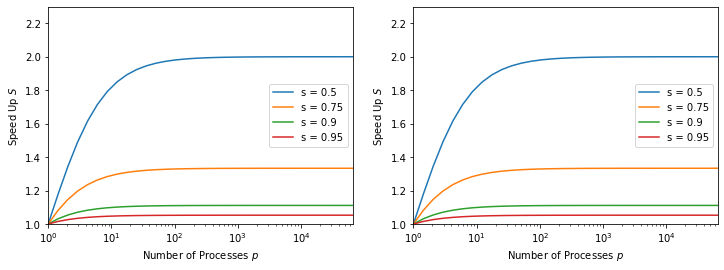

In [3]:
p = numpy.logspace(0, 16, 32, base=2)
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1,2,1)
for (i, s) in enumerate([0.5, 0.75, 0.90, 0.95]):
    axes.semilogx(p, 1 / (s + (1 - s) / p), label="s = %s" % s)
axes.set_title("")
axes.set_xlim([1.0, p[-1]])
axes.set_ylim([1.0, 2.3])
axes.set_xlabel(r"Number of Processes $p$")
axes.set_ylabel(r"Speed Up $S$")
axes.legend()

axes = fig.add_subplot(1,2,2)
for (i, s) in enumerate([0.5, 0.75, 0.90, 0.95]):
    axes.semilogx(p, 1 / (s + (1 - s) / p), label="s = %s" % s)

axes.set_title("")
axes.set_xlim([1.0, p[-1]])
axes.set_ylim([1.0, 2.3])
axes.set_xlabel(r"Number of Processes $p$")
axes.set_ylabel(r"Speed Up $S$")
axes.legend()

plt.show()

## Threads vs. Processes

## Task vs. Data Parallelism

## Partitioning and Load Balancing

## Scalability

### Strong Scaling

Blah

### Strong Scaling

![image](figures/scaling/strong_scaling_1.png)

### Strong Scaling

![image](figures/scaling/strong_scaling_2.png)

### Strong Scaling

![image](figures/scaling/strong_scaling_3.png)

### Weak Scaling

<img align=center  width=250 src="figures/scaling/weak_scaling_1.jpg">

### Weak Scaling

<img align=center  width=250 src="figures/scaling/weak_scaling_2.jpg">
<img align=center  width=250 src="figures/scaling/weak_scaling_3.jpg">

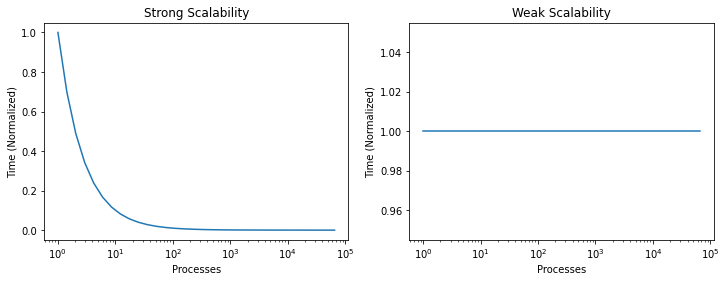

In [4]:
p = numpy.logspace(0, 16, 32, base=2)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1, 2, 1)
work = numpy.ones(32)
axes.semilogx(p, work / p)
axes.set_title("Strong Scalability")
axes.set_xlabel("Processes")
axes.set_ylabel("Time (Normalized)")

axes = fig.add_subplot(1, 2, 2)
work = p
axes.semilogx(p, work / p)
axes.set_title("Weak Scalability")
axes.set_xlabel("Processes")
axes.set_ylabel("Time (Normalized)")

plt.show()

## Machine Architecture Considerations

Before we can talk about performance we need to understand a bit about modern computing architectures.  Note that this glossing over a lot of important details as we will focus on only the details that we will specifically deal with.

### Von Neumann Architecture
![image](./figures/vonneumann_architecture.png)
*Kapooht - Wikipedia Commons*

### Instruction Pipeline
![image](./figures/pipeline_1.png)
*Cburnett - Wikipedia Commons*

![image](./figures/Memory-Hierarchy.jpg)

![image](./figures/memory_architecture.png)

## Models

### Roof-line Model
![image](./figures/roofline.png)
*Giu.natale - Wikipedia Commons*

In [ ]:
memory_bound = lambda x: m * x + b
compute_bound = lambda x: b

def memory_bound(band_width):
    return 0

def compute_bound(clock_speed):
    return 0

def roofline_model(intensity):
    
    return None



### Current Performance Bottlenecks

 - Transistors can no longer be packed more densely in a single core
 - Memory is really the bottleneck
 - Hard limit due to the speed of light
 - Power consumption and therefore heat dissipation
 
### Solutions?
 - Many-core technologies
 - Memory hierarchies
 - Algorithms that take into account these limitations

![image](./figures/memory_single_core.png)

![image](./figures/pipeline_2.png)
*Cburnett - Wikipedia Commons*

### Many-Core Architectures

![image](./figures/gpu/kepler_arch.png)

![image](./figures/gpu/kepler_smx.png)
*NVIDIA - Kepler GK110/210 White Paper - http://images.nvidia.com/content/pdf/tesla/NVIDIA-Kepler-GK110-GK210-Architecture-Whitepaper.pdf*